In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Introduction to Bayesian Methods

Bayesian methods refer to mathematical tools that are useful and relevant for **Bayesian inference**, which is based on the work of Thomas Bayes (1701–1761). Bayes was an English mathematician and Presbyterian minister, best known for formulating an early version of **Bayes' Theorem**.  

**Figure 1.1** (page 3) shows part of the Wikipedia article for Thomas Bayes. Bayes' ideas were further developed by others, notably:

- **Pierre-Simon Laplace** (1749–1827), a French mathematician  
- **Harold Jeffreys** (1891–1989), a British astronomer

## Bayesian vs. Classical Inference

Bayesian inference differs from **classical (frequentist) inference** by treating model parameters as random variables instead of constants. The Bayesian paradigm allows us to formally incorporate **prior information** into the analysis and can help formulate complex statistical models that might challenge classical approaches.

## Priors in Bayesian Inference

One drawback of Bayesian inference is the requirement to specify a **prior distribution**, even when no prior information is available. However, the development of suitable **uninformative priors** (also known as noninformative, objective, or reference priors) has addressed this issue.

- In many cases, these priors lead to the same point and interval estimates as classical inference.
- As the sample size increases, the Bayesian approach often converges to the same results as classical inference, regardless of the prior distribution.

## Computational Challenges

One challenge in Bayesian inference is the complexity of the necessary computations, which often involve multiple integrals or summations that are **intractable** or difficult to solve, even with advanced numerical techniques.

In such cases, the solutions can be approximated using **Monte Carlo (MC)** methods. The main idea is to use a large sample of values generated from a suitable probability distribution.

### Markov Chain Monte Carlo (MCMC) Methods

Generating these samples can be a challenge, but it is often solved using **Markov Chain Monte Carlo (MCMC)** methods. Both MC and MCMC techniques will be explored in later chapters of the course.

## Bayes' Theorem in Mathematical Form

The well-known **Bayes' Theorem** is expressed mathematically as:

$$
P(A | B) = \frac{P(B | A) P(A)}{P(B)}
$$

Where:
- $ P(A | B) $ is the **posterior probability**, the probability of event $ A $ occurring given $ B $
- $ P(B | A) $ is the **likelihood**, the probability of observing $ B $ given $ A $
- $ P(A) $ is the **prior probability** of $ A $
- $ P(B) $ is the **marginal likelihood**, the total probability of $ B $

# Bayes' Rule

The starting point for **Bayesian inference** is **Bayes' rule**, which in its simplest form is written as:

$$
P(A | B) = \frac{P(A) P(B | A)}{P(A) P(B | A) + P(\neg A) P(B | \neg A)}
$$

where $ A $ and $ B $ are events such that $ P(B) > 0 $.

This can be proven by using the definition of conditional probability and the law of total probability.

### Proof:
1. **By the definition of conditional probability:**

$$
P(A | B) = \frac{P(AB)}{P(B)}
$$

2. **By the multiplicative law of probability:**

$$
P(AB) = P(A) P(B | A)
$$

3. **Using the law of total probability for $ P(B) $:**

$$
P(B) = P(AB) + P(\neg A B) = P(A) P(B | A) + P(\neg A) P(B | \neg A)
$$

Thus, substituting into the conditional probability expression gives us Bayes' rule.

### Interpretation:

- The posterior probability $ P(A | B) $ is equal to the prior probability $ P(A) $ multiplied by a factor, which is given by:

$$
\frac{P(B | A)}{P(B)}
$$

### Terminology:

- $ P(A) $ is called the **prior probability** of $ A $, meaning the probability of $ A $ before $ B $ is known to have occurred.
- $ P(A | B) $ is the **posterior probability** of $ A $ given $ B $, meaning the probability of $ A $ after $ B $ is known.
  
We may also say that $ P(A) $ represents our **a priori beliefs** about $ A $, while $ P(A | B) $ represents our **a posteriori beliefs** regarding $ A $.

## General Case of Bayes' Rule

More generally, we can consider any event $ B $ such that $ P(B) > 0 $ and $ k $ events $ A_1, A_2, \dots, A_k $ which form a **partition** of a superset of $ B $ (such as the entire sample space $ S $).

For any $ i = 1, \dots, k $, Bayes' rule can be written as:

$$
P(A_i | B) = \frac{P(A_i) P(B | A_i)}{P(B)}
$$

### Where:
- $ P(A_i | B) $ is the **posterior probability** of event $ A_i $ given $ B $
- $ P(A_i) $ is the **prior probability** of $ A_i $
- $ P(B | A_i) $ is the **likelihood** of $ B $ given $ A_i $
- $ P(B) $ is the **marginal likelihood** or the total probability of $ B $, which can be expressed as:

$$
P(B) = \sum_{j=1}^{k} P(A_j) P(B | A_j)
$$

In this general case, the probability $ P(B) $ is computed by summing over all possible events $ A_1, \dots, A_k $, where each $ A_j $ is weighted by its prior probability and the likelihood of $ B $ given $ A_j $.

### Recap:
- **Prior Probability**: $ P(A_i) $
- **Posterior Probability**: $ P(A_i | B) $
- **Likelihood**: $ P(B | A_i) $
- **Marginal Likelihood**: $ P(B) = \sum_{j=1}^{k} P(A_j) P(B | A_j) $

## Example: Spam Detection

Suppose we are building a spam filter that classifies emails as **Spam (S)** or **Not Spam (¬S)** based on whether certain keywords appear in the email. Let's say we observe the keyword "offer" in an email and we want to calculate the probability that the email is spam given that it contains this keyword.

### Given Data:
- Prior probability that any email is spam:  
  $ P(S) = 0.3 $ (30% of emails are spam)
  
- Prior probability that an email is not spam:  
  $ P(\neg S) = 0.7 $ (70% of emails are not spam)

- Probability that the word "offer" appears in a spam email:  
  $ P(W | S) = 0.8 $ (80% of spam emails contain the word "offer")

- Probability that the word "offer" appears in a non-spam email:  
  $ P(W | \neg S) = 0.1 $ (10% of non-spam emails contain the word "offer")

### Step 1: Compute the total probability of the word "offer" appearing in an email

We need to calculate the marginal probability \( P(W) \) that the word "offer" appears in an email, regardless of whether it is spam or not:

$$
P(W) = P(S) P(W | S) + P(\neg S) P(W | \neg S)
$$

Substituting the values:

$$
P(W) = (0.3)(0.8) + (0.7)(0.1)
$$

$$
P(W) = 0.24 + 0.07 = 0.31
$$

### Step 2: Calculate the posterior probability that the email is spam given the word "offer" appears

Now we use Bayes' Rule to compute the posterior probability $ P(S | W) $:

$$
P(S | W) = \frac{P(S) P(W | S)}{P(W)}
$$

Substituting the values:

$$
P(S | W) = \frac{(0.3)(0.8)}{0.31} = \frac{0.24}{0.31} \approx 0.774
$$

### Step 3: Calculate the probability that the email is not spam given the word "offer" appears

Similarly, we can calculate $ P(\neg S | W) $:

$$
P(\neg S | W) = \frac{P(\neg S) P(W | \neg S)}{P(W)}
$$

Substituting the values:

$$
P(\neg S | W) = \frac{(0.7)(0.1)}{0.31} = \frac{0.07}{0.31} \approx 0.226
$$

### Conclusion:

Given that the email contains the word "offer":
- The probability that the email is spam is $ P(S | W) \approx 0.774 $ (77.4%)
- The probability that the email is not spam is $ P(\neg S | W) \approx 0.226 $ (22.6%)

This shows how Bayes' rule can be applied in a spam detection system to update the likelihood that an email is spam based on the presence of certain keywords.

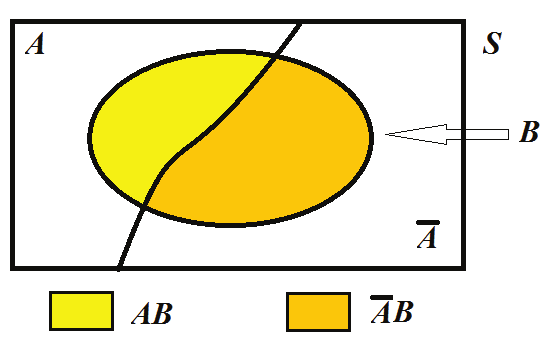
Figure 1.2 Venn diagram for Exercise 1.1

Figure 1.2 is a Venn diagram which illustrates how B may be considered
as the union of AB and AB . The required posterior probability of A
given B is simply the probability of AB divided by the probability of B.

## Generalization of Posterior Probability as a Function of Prevalence and Test Accuracy

We are interested in generalizing the formula for the posterior probability $ P(A | B) $ based on two variables:
- $ p = P(A) $: the **prevalence** or proportion of the population with the disease.
- $ q = P(B | A) $: the **accuracy** of the test, which is the probability that the test returns positive given the person has the disease.

### The Posterior Probability Formula:

The posterior probability $ P(A | B) $ is given by Bayes' rule:

$$
P(A | B) = \frac{P(A) P(B | A)}{P(A) P(B | A) + P(\neg A) P(B | \neg A)}
$$

Substituting $ p = P(A) $ and $ q = P(B | A) $, and assuming that the test has the same accuracy for both $ P(B | A) $ and $ P(B | \neg A) $, we get:

$$
P(A | B) = \frac{pq}{pq + (1 - p)(1 - q)}
$$

### Interpretation:
- $ p $ is the prevalence of the disease (proportion of the population with the disease).
- $ q $ is the accuracy of the test (the probability the test correctly identifies the disease).
- $ P(A | B) $ is the posterior probability that a person has the disease given a positive test result.

### Visualization:

We can visualize how $ P(A | B) $ changes as a function of:
1. **Prevalence $ p $**, while keeping the test accuracy $ q $ fixed.
2. **Test accuracy $ q $**, while keeping the prevalence $ p $ fixed.

#### Subplot (a): $ P(A | B) $ as a Function of $ p $ with $ q $ fixed
For fixed test accuracy $ q = 0.9 $ and $ q = 0.95 $, we plot $ P(A | B) $ as a function of $ p $, the disease prevalence.

#### Subplot (b): $ P(A | B) $ as a Function of $ q $ with $ p $ fixed
For fixed prevalence $ p = 0.01 $ and $ p = 0.05 $, we plot $ P(A | B) $ as a function of $ q $, the test accuracy.

In both subplots, the answer $ P(A | B) = \frac{1}{12} $ is represented as a point, corresponding to $ p = 0.01 $ and $ q = 0.9 $.

### Formula Summary:

For any $ p $ and $ q $:

$$
P(A | B) = \frac{pq}{pq + (1 - p)(1 - q)}
$$

This formula allows you to compute the posterior probability of a person having the disease given a positive test result based on the disease prevalence and the test's accuracy.

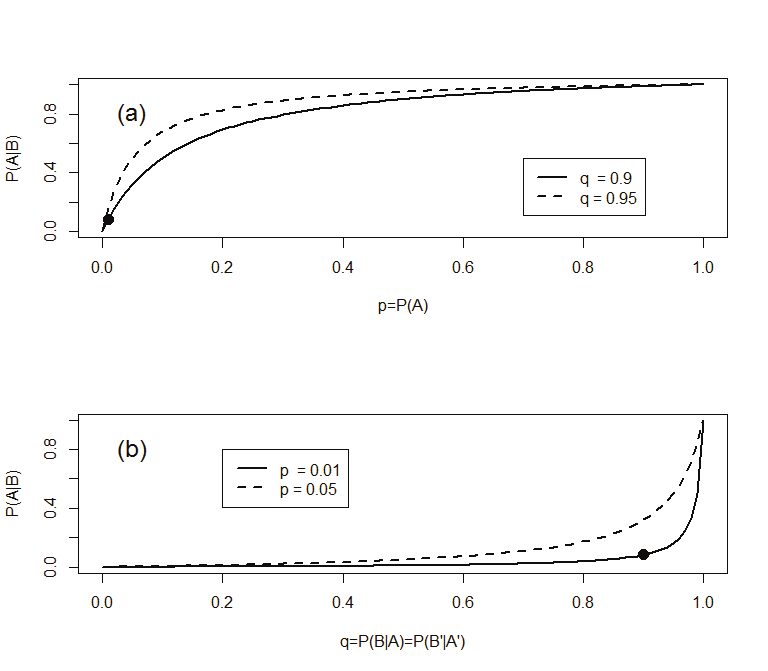


Figure 1.3 Posterior probability of disease as functions of p
and q

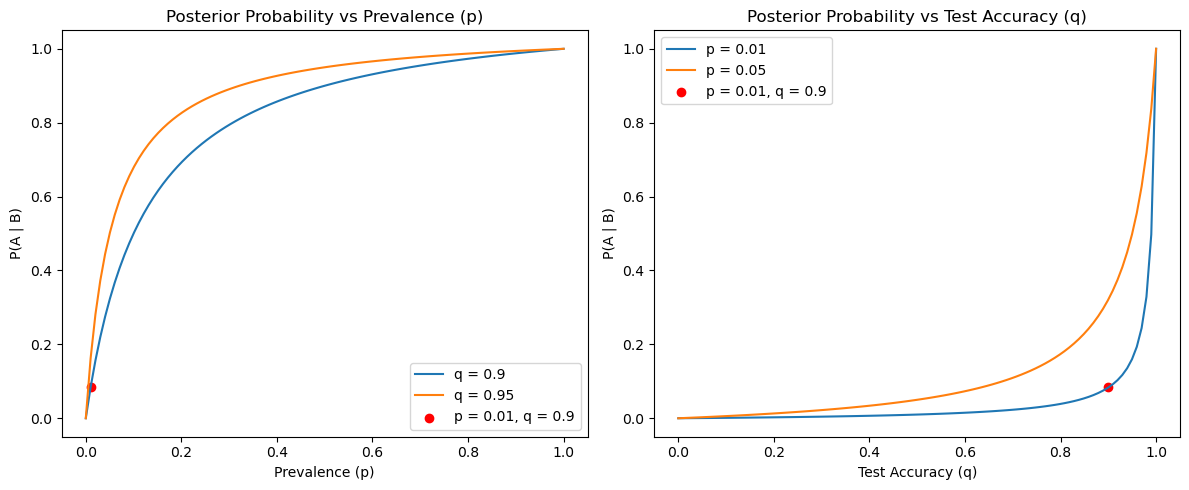

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for posterior probability P(A | B)
def posterior_probability(p, q):
    return (p * q) / (p * q + (1 - p) * (1 - q))

# Prevalence values (for subplot a)
p_values = np.linspace(0, 1, 100)
q_fixed_1 = 0.9
q_fixed_2 = 0.95

# Accuracy values (for subplot b)
q_values = np.linspace(0, 1, 100)
p_fixed_1 = 0.01
p_fixed_2 = 0.05

# Create the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Subplot (a): P(A | B) as a function of p with fixed q
ax[0].plot(p_values, posterior_probability(p_values, q_fixed_1), label='q = 0.9')
ax[0].plot(p_values, posterior_probability(p_values, q_fixed_2), label='q = 0.95')
ax[0].scatter(0.01, posterior_probability(0.01, 0.9), color='red', label='p = 0.01, q = 0.9')
ax[0].set_title('Posterior Probability vs Prevalence (p)')
ax[0].set_xlabel('Prevalence (p)')
ax[0].set_ylabel('P(A | B)')
ax[0].legend()

# Subplot (b): P(A | B) as a function of q with fixed p
ax[1].plot(q_values, posterior_probability(p_fixed_1, q_values), label='p = 0.01')
ax[1].plot(q_values, posterior_probability(p_fixed_2, q_values), label='p = 0.05')
ax[1].scatter(0.9, posterior_probability(0.01, 0.9), color='red', label='p = 0.01, q = 0.9')
ax[1].set_title('Posterior Probability vs Test Accuracy (q)')
ax[1].set_xlabel('Test Accuracy (q)')
ax[1].set_ylabel('P(A | B)')
ax[1].legend()

plt.tight_layout()
plt.show()


## Problem: Defective Products and Manufacturing Plant

A company manufactures products in three different plants:
- **Plant A** produces 50% of the company's products, and 2% of those products are defective.
- **Plant B** produces 30% of the company's products, and 3% of those products are defective.
- **Plant C** produces 20% of the company's products, and 5% of those products are defective.

A product is randomly selected and found to be defective. What is the probability that this product came from **Plant C**?

### Step 1: Define the events
Let:
- $ A $ = the event that the product came from **Plant A**.
- $ B $ = the event that the product came from **Plant B**.
- $ C $ = the event that the product came from **Plant C**.
- $ D $ = the event that the product is defective.

We are asked to find $ P(C | D) $, the probability that the product came from Plant C given that it is defective.

### Step 2: Apply Bayes' Rule

Bayes' rule states:

$$
P(C | D) = \frac{P(C) P(D | C)}{P(D)}
$$

### Step 3: Compute $ P(D) $ using the law of total probability

The total probability $ P(D) $ (the probability that a randomly selected product is defective) is the sum of the probabilities of a product being defective given that it came from each plant, weighted by the proportion of products produced by each plant:

$$
P(D) = P(A) P(D | A) + P(B) P(D | B) + P(C) P(D | C)
$$

Substitute the given values:
- $ P(A) = 0.50 $ and $ P(D | A) = 0.02 $
- $ P(B) = 0.30 $ and $ P(D | B) = 0.03 $
- $ P(C) = 0.20 4 and $ P(D | C) = 0.05 $

So,

$$
P(D) = (0.50)(0.02) + (0.30)(0.03) + (0.20)(0.05)
$$

$$
P(D) = 0.01 + 0.009 + 0.01 = 0.029
$$

### Step 4: Compute the posterior probability

Now, we use Bayes' rule to compute $ P(C | D) $:

$$
P(C | D) = \frac{P(C) P(D | C)}{P(D)}
$$

Substitute the known values:

$$
P(C | D) = \frac{(0.20)(0.05)}{0.029}
$$

$$
P(C | D) = \frac{0.01}{0.029} \approx 0.3448
$$

### Conclusion:

The probability that the defective product came from **Plant C** is approximately **34.48%**.


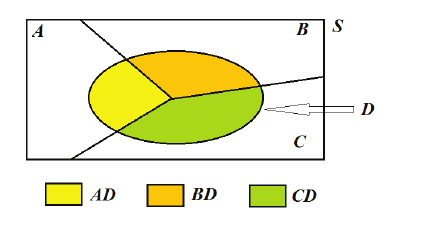
Figure 4 Venn diagram for Exercise 2

### Bayes factors 

One way to perform hypothesis testing in the Bayesian framework is via the theory of Bayes factors. Suppose that on the basis of an observed event D (standing for data) we wish to test a null hypothesis $H_0$ : $E_0$ versus an alternative hypothesis H1 : E1 , where E0 and E1 are two events (which are not necessarily mutually exclusive or even exhaustive of the event space). Then we calculate: π 0 = P( E0 ) = the prior probability of the null hypothesis π 1 = P( E1 ) = the prior probability of the alternative hypothesis PRO = π 0 / π 1 = the prior odds in favour of the null hypothesis p0 = P ( E0 | D ) = the posterior probability of the null hypothesis p1 = P ( E1 | D ) = the posterior probability of the alternative hypothesis POO = p0 / p1 = the posterior odds in favour of the null hypothesis. The Bayes factor is then defined as BF = POO / PRO. This may be interpreted as the factor by which the data have multiplied the odds in favour of the null hypothesis relative to the alternative hypothesis. If BF > 1 then the data has increased the relative likelihood of the null, and if BF < 1 then the data has decreased that relative likelihood. The magnitude of BF tells us how much effect the data has had on the relative likelihood.
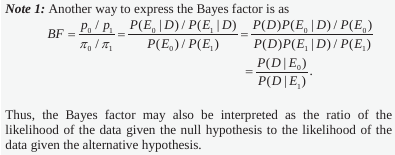

Note 2: The idea of a Bayes factor extends to situations where the null and alternative hypotheses are statistical models rather than events. This idea may be taken up later.

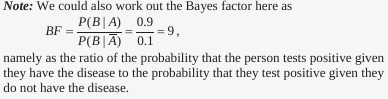

## Exercise: Bayes Factor in Manufacturing Plants

Consider the manufacturing problem where products are produced by three different plants:
- **Plant A** produces 50% of the company's products, and 2% of these are defective.
- **Plant B** produces 30% of the company's products, and 3% of these are defective.
- **Plant C** produces 20% of the company's products, and 5% of these are defective.

### Scenario:
A product is randomly selected from the company's production line and found to be defective. You want to test whether the product is more likely to have come from **Plant C** than from **Plant A**.

### Part 1: Compute the Posterior Probabilities
Using the information provided:
1. Compute the posterior probability that the product came from **Plant A**, given that it is defective.
2. Compute the posterior probability that the product came from **Plant C**, given that it is defective.

### Part 2: Compute the Bayes Factor
The **Bayes Factor** is used to compare two hypotheses. In this case, the two hypotheses are:
- $ H_A $: The defective product came from **Plant A**.
- $ H_C $: The defective product came from **Plant C**.

The Bayes Factor $ BF_{C,A} $ is defined as:

$$
BF_{C,A} = \frac{P(D | C)}{P(D | A)}
$$

Where:
- $ P(D | C) $ is the likelihood of the product being defective given that it came from Plant C.
- $ P(D | A) $ is the likelihood of the product being defective given that it came from Plant A.

### Tasks:
1. **Calculate the Bayes Factor** $ BF_{C,A} $ using the provided data.
2. **Interpret the Bayes Factor** to decide which plant is more likely to have produced the defective product. What does the Bayes Factor say about the relative likelihood of the product coming from Plant C compared to Plant A?

### Hints:
- Use the defect rates for **Plant A** and **Plant C** in your Bayes Factor calculations.
- Recall that the Bayes Factor measures how much more likely one hypothesis is compared to another based on the observed data.
- Interpret the result based on typical Bayes Factor ranges:
  - $ BF_{C,A} > 1 $: Evidence in favor of **Plant C**.
  - $ BF_{C,A} < 1 $: Evidence in favor of **Plant A**.


## Solution: Bayes Factor in Manufacturing Plants

### Part 1: Compute the Posterior Probabilities

We are given the following information:
- **Plant A** produces 50% of the company’s products, with a defect rate of 2%.
- **Plant B** produces 30% of the company’s products, with a defect rate of 3%.
- **Plant C** produces 20% of the company’s products, with a defect rate of 5%.

We want to compute the posterior probabilities that the defective product came from **Plant A** and **Plant C**.

#### Step 1: Define the events
- $ P_A $ = event that the product came from Plant A.
- $ P_C $ = event that the product came from Plant C.
- $ D $ = event that the product is defective.

We need to find $ P(P_A | D) $ and $ P(P_C | D) $.

#### Step 2: Compute the total probability $ P(D) $
Using the law of total probability, the overall probability $ P(D) $ that a randomly selected product is defective is given by:

$$
P(D) = P(P_A) P(D | P_A) + P(P_B) P(D | P_B) + P(P_C) P(D | P_C)
$$

Substitute the given values:
- $ P(P_A) = 0.50 $, $ P(D | P_A) = 0.02 $
- $ P(P_B) = 0.30 $, $ P(D | P_B) = 0.03 $
- $ P(P_C) = 0.20 $, $ P(D | P_C) = 0.05 $

So,

$$
P(D) = (0.50)(0.02) + (0.30)(0.03) + (0.20)(0.05)
$$

$$
P(D) = 0.01 + 0.009 + 0.01 = 0.029
$$

#### Step 3: Compute the posterior probabilities

Now, using Bayes’ theorem, we can calculate the posterior probabilities for **Plant A** and **Plant C**.

For **Plant A**:

$$
P(P_A | D) = \frac{P(P_A) P(D | P_A)}{P(D)} = \frac{(0.50)(0.02)}{0.029} = \frac{0.01}{0.029} \approx 0.3448
$$

For **Plant C**:

$$
P(P_C | D) = \frac{P(P_C) P(D | P_C)}{P(D)} = \frac{(0.20)(0.05)}{0.029} = \frac{0.01}{0.029} \approx 0.3448
$$

### Part 2: Compute the Bayes Factor

The **Bayes Factor** compares the likelihood of the product being defective given that it came from **Plant C** versus **Plant A**. The Bayes Factor \( BF_{C,A} \) is defined as:

$$
BF_{C,A} = \frac{P(D | P_C)}{P(D | P_A)}
$$

Substitute the values for \( P(D | P_C) \) and \( P(D | P_A) \):

$$
BF_{C,A} = \frac{0.05}{0.02} = 2.5
$$

### Part 3: Interpretation of the Bayes Factor

- The Bayes Factor $ BF_{C,A} = 2.5 $ suggests that the defective product is **2.5 times more likely to have come from Plant C than from Plant A**.
- A Bayes Factor greater than 1 indicates evidence in favor of **Plant C** as the source of the defective product.

Thus, based on the Bayes Factor, there is moderate evidence to suggest that the defective product is more likely to have come from **Plant C**.


In [1]:
# Define the given data
prob_A = 0.50  # Probability that the product came from Plant A
prob_B = 0.30  # Probability that the product came from Plant B
prob_C = 0.20  # Probability that the product came from Plant C

defect_A = 0.02  # Probability of a defect given Plant A
defect_B = 0.03  # Probability of a defect given Plant B
defect_C = 0.05  # Probability of a defect given Plant C

# Step 1: Compute the total probability P(D)
P_D = (prob_A * defect_A) + (prob_B * defect_B) + (prob_C * defect_C)

# Step 2: Compute the posterior probabilities using Bayes' theorem
P_A_given_D = (prob_A * defect_A) / P_D
P_C_given_D = (prob_C * defect_C) / P_D

# Step 3: Compute the Bayes Factor BF(C,A)
bayes_factor_CA = defect_C / defect_A

# Output the results
print(f"Total probability of defect P(D): {P_D:.4f}")
print(f"Posterior probability that the product came from Plant A: P(A | D) = {P_A_given_D:.4f}")
print(f"Posterior probability that the product came from Plant C: P(C | D) = {P_C_given_D:.4f}")
print(f"Bayes Factor BF(C,A): {bayes_factor_CA:.4f}")

# Interpret the Bayes Factor
if bayes_factor_CA > 1:
    print("Evidence in favor of Plant C being the source of the defective product.")
elif bayes_factor_CA < 1:
    print("Evidence in favor of Plant A being the source of the defective product.")
else:
    print("Equal likelihood for Plant A and Plant C.")


Total probability of defect P(D): 0.0290
Posterior probability that the product came from Plant A: P(A | D) = 0.3448
Posterior probability that the product came from Plant C: P(C | D) = 0.3448
Bayes Factor BF(C,A): 2.5000
Evidence in favor of Plant C being the source of the defective product.


### 1.4 Bayesian Models: Overview and Components

A **Bayesian model** extends classical parametric models by incorporating **prior distributions** for the model parameters, which are treated as random variables rather than fixed unknowns. The goal of Bayesian inference is to update the prior beliefs about the model parameters based on observed data.

#### Basic Components of a Bayesian Model:

1. **The Data (denoted by $ y $):**
   - This represents the observed data or evidence.
   - In Bayesian models, we treat the data as being generated from a probability distribution that depends on the parameters.

2. **The Parameter (denoted by $ \theta $):**
   - This is the unknown parameter or set of parameters we want to estimate.
   - Bayesian methods treat $ \theta $ as a random variable with its own probability distribution, the **prior distribution**.

3. **The Model Distribution $ f(y | \theta) $:**
   - This describes how the data $ y $ is distributed, conditional on the parameter $ \theta $.
   - This can be a probability density function (pdf) for continuous data, a probability mass function (pmf) for discrete data, or a mixed distribution.

   $$
   (y | \theta) \sim f(y | \theta)
   $$

4. **The Prior Distribution $ f(\theta) $:**
   - The prior represents our belief about the parameter $ \theta $ before observing the data.
   - It could be subjective, based on expert knowledge, or objective, based on non-informative priors.

   $$
   \theta \sim f(\theta)
   $$

#### Example of Bayesian Model:

Let’s consider a simple case where both the parameter $ \theta $ and the data $ y $ are discrete random variables. Suppose we are flipping a biased coin and want to estimate the bias, $ \theta $, which represents the probability of landing heads.

1. **Prior Distribution:**
   - We specify the prior belief about $ \theta $, e.g., $ \theta \sim \text{Beta}(2, 2) $. This prior reflects the belief that the coin is likely fair, but we're uncertain.

   $$
   \theta \sim \text{Beta}(2, 2)
  $$

2. **Model Distribution:**
   - The likelihood function for observing $ y $ heads out of $ n $ flips, given $ \theta $, follows a binomial distribution:

   $$
   y | \theta \sim \text{Binomial}(n, \theta)
   $$

3. **Posterior Distribution:**
   - After observing the data $ y $, we use Bayes' theorem to update our belief about $ \theta $, yielding the posterior distribution:

   $$
   P(\theta | y) \propto P(y | \theta) P(\theta)
   $$
   
   where $ P(y | \theta) $ is the likelihood, and $ P(\theta) $ is the prior.

#### Key Notes:
- **Mixed Distributions**: A mixed distribution can involve both continuous and discrete components, indicated by jumps or discontinuities in the cumulative distribution function (cdf).
- **Parameterization**: $ \theta $ and $ y $ can represent scalars, vectors, matrices, or arrays, depending on the model complexity.


### 1.5 The Posterior Distribution

In Bayesian inference, we are interested in finding the posterior probability distribution of $ \theta $. This is done using the equation:

$$
f(\theta | y) = \frac{f(\theta) f(y | \theta)}{f(y)}
$$

Here, $ f(y) $ is the unconditional (or prior) pdf of $ y $, which is given by:

$$
f(y) =
\begin{cases} 
\int f(\theta) f(y | \theta) \, d\theta & \text{if } \theta \text{ is continuous}, \\
\sum f(\theta) f(y | \theta) & \text{if } \theta \text{ is discrete}.
\end{cases}
$$

In the continuous case, the integral $ \int f(y | \theta) \, dF(\theta) $ is called the **Lebesgue-Stieltjes integral**, which may require breaking into parts if $ \theta $ has a mixed distribution. If $ \theta $ is continuous, we can think of:

$$
dF(\theta) = f(\theta) d\theta
$$

### Exercise 1.4: Loaded Dice

Consider six loaded dice with the following properties:
- **Die A** has a probability of $ 0.1 $ for rolling a 6.
- **Dice B** and **C** each have a probability of $ 0.2 $ for rolling a 6.
- **Dice D**, **E**, and **F** each have a probability of $ 0.3 $ for rolling a 6.

A die is chosen randomly from the six dice and rolled twice. On both occasions, a 6 is rolled. What is the **posterior probability distribution** of $ \theta $, the probability of rolling a 6 on the chosen die?

### Solution to Exercise 1.4:

Let $ y $ represent the number of times that a 6 comes up on the two rolls of the chosen die, and let $ \theta $ be the probability of rolling a 6 on a single roll of that die. The Bayesian model is as follows:

- **Prior Probability**: The prior probability for each die is $ P(\theta) = \frac{1}{6} $, since each die is equally likely to be chosen.
- **Likelihood Function**: The likelihood of observing $ y = 2 $ (i.e., two rolls of 6) for a given die with probability $ \theta $ of rolling a 6 is:

$$
P(y = 2 | \theta) = \theta^2
$$

- **Posterior Distribution**: Using Bayes' Theorem, the posterior probability for each $ \theta $ is:

$$
P(\theta | y = 2) = \frac{P(\theta) P(y = 2 | \theta)}{P(y = 2)}
$$

We now compute the posterior for each die:

1. **Die A**:
   $$
   P(\theta = 0.1 | y = 2) = \frac{\frac{1}{6} \times (0.1)^2}{P(y = 2)}
   $$

2. **Dice B and C**:
   $$
   P(\theta = 0.2 | y = 2) = \frac{\frac{1}{6} \times (0.2)^2}{P(y = 2)}
   $$

3. **Dice D, E, and F**:
   $$
   P(\theta = 0.3 | y = 2) = \frac{\frac{1}{6} \times (0.3)^2}{P(y = 2)}
   $$

To normalize the probabilities, we compute $ P(y = 2) $, which is the sum of all possible likelihoods:

$$
P(y = 2) = \frac{1}{6} \times \left[(0.1)^2 + 2 \times (0.2)^2 + 3 \times (0.3)^2 \right]
$$

Thus, the posterior probabilities are:

- For **Die A**: $ P(\theta = 0.1 | y = 2) $
- For **Dice B and C**: $ P(\theta = 0.2 | y = 2) $
- For **Dice D, E, and F**: $ P(\theta = 0.3 | y = 2) $

Finally, the posterior probability distribution of $ \theta $ is the normalized result of the above calculations.


In [2]:
import numpy as np

# Define the probabilities of rolling a 6 for each die
probabilities = {
    'A': 0.1,
    'B': 0.2,
    'C': 0.2,
    'D': 0.3,
    'E': 0.3,
    'F': 0.3
}

# Total number of dice
num_dice = len(probabilities)

# Prior probability for each die (equal)
prior_probability = 1 / num_dice

# Function to calculate the likelihood of rolling two 6s
def likelihood(theta):
    return theta**2

# Calculate the posterior probabilities
posterior = {}
total_prob_y = 0

# Compute P(y = 2) for normalization
for die, theta in probabilities.items():
    likelihood_value = likelihood(theta)
    posterior[die] = prior_probability * likelihood_value
    total_prob_y += posterior[die]

# Normalize the posterior probabilities
for die in posterior:
    posterior[die] /= total_prob_y

# Print the posterior probabilities
for die, prob in posterior.items():
    print(f"P(θ = {probabilities[die]} | y = 2 for Die {die}) = {prob:.4f}")


P(θ = 0.1 | y = 2 for Die A) = 0.0278
P(θ = 0.2 | y = 2 for Die B) = 0.1111
P(θ = 0.2 | y = 2 for Die C) = 0.1111
P(θ = 0.3 | y = 2 for Die D) = 0.2500
P(θ = 0.3 | y = 2 for Die E) = 0.2500
P(θ = 0.3 | y = 2 for Die F) = 0.2500


### 1.6 The Proportionality Formula

Observe that $ f(y) $ is a constant with respect to $ \theta $ in the Bayesian equation:

$$
f(\theta | y) = \frac{f(\theta) f(y | \theta)}{f(y)},
$$

which means that we may also write the equation as:

$$
f(\theta | y) \propto f(\theta) f(y | \theta),
$$

where $ k = f(y) $ and $ c = \frac{1}{k} $. 

We may also express this relationship as:

$$
f(\theta | y) \propto c f(\theta) f(y | \theta).
$$

To emphasize that the proportionality is specifically with respect to $ \theta $, we can write:

$$
\theta f(\theta | y) \propto f(\theta) f(y | \theta).
$$

Another way to express the last equation is:

$$
f(\theta | y) \propto f(\theta) \times L(\theta | y),
$$

where $ L(\theta | y) $ is the likelihood function (defined as the model density $ f(y | \theta) $ multiplied by any constant with respect to $ \theta $, and viewed as a function of $ \theta $ rather than of $ y $).

In words, this states that: 

**The posterior is proportional to the prior times the likelihood.**

These observations indicate a shortcut method for determining the required posterior distribution, which obviates the need for calculating $ f(y) $ (which may be difficult). This method involves multiplying the prior density (or the kernel of that density) by the likelihood function and trying to identify the resulting function of $ \theta $ as the density of a well-known or common distribution. Once the posterior distribution has been identified, $ f(y) # may then be easily obtained as the associated normalizing constant.

### Exercise 1.5: Loaded Dice with Solution via the Proportionality Formula

Suppose that:

- Die A has a probability $ \theta_A = 0.1 $ of coming up 6.
- Dice B and C each have a probability $ \theta_B = \theta_C = 0.2 $.
- Dice D, E, and F each have a probability $ \theta_D = \theta_E = \theta_F = 0.3 $.

Let $ y $ denote the number of times 6 comes up. In this case, $ y = 2 $.

#### Step 1: Likelihood Function

The likelihood of observing \( y = 2 \) when rolling a die that has a probability \( \theta \) of showing a 6 is given by:

$$
f(y | \theta) = \binom{2}{y} \theta^y (1 - \theta)^{2 - y} = \binom{2}{2} \theta^2 (1 - \theta)^0 = \theta^2.
$$

#### Step 2: Prior Distribution

The prior distribution for each die can be represented as:

- For Die A: 
  $$ f(\theta_A) = \frac{1}{6} $$
  
- For Dice B and C:
  $$ f(\theta_B) = f(\theta_C) = \frac{1}{6} $$
  
- For Dice D, E, and F:
  $$ f(\theta_D) = f(\theta_E) = f(\theta_F) = \frac{1}{6}. $$

#### Step 3: Posterior Distribution Using Proportionality

The posterior distribution can be computed using the proportionality formula:

$$
f(\theta | y) \propto f(\theta) f(y | \theta).
$$

Thus, for each die:

- For Die A:
  $$ 
  f(\theta_A | y) \propto f(\theta_A) f(y | \theta_A) = \frac{1}{6} \times (0.1)^2 = \frac{0.01}{6}. 
  $$

- For Die B:
  $$ 
  f(\theta_B | y) \propto f(\theta_B) f(y | \theta_B) = \frac{1}{6} \times (0.2)^2 = \frac{0.04}{6}. 
  $$

- For Die C:
  $$ 
  f(\theta_C | y) \propto f(\theta_C) f(y | \theta_C) = \frac{1}{6} \times (0.2)^2 = \frac{0.04}{6}. 
  $$

- For Die D:
  $$ 
  f(\theta_D | y) \propto f(\theta_D) f(y | \theta_D) = \frac{1}{6} \times (0.3)^2 = \frac{0.09}{6}. 
  $$

- For Die E:
  $$ 
  f(\theta_E | y) \propto f(\theta_E) f(y | \theta_E) = \frac{1}{6} \times (0.3)^2 = \frac{0.09}{6}. 
  $$

- For Die F:
  $$ 
  f(\theta_F | y) \propto f(\theta_F) f(y | \theta_F) = \frac{1}{6} \times (0.3)^2 = \frac{0.09}{6}. 
  $$

#### Step 4: Normalization

Now, we compute the normalization constant:

$$
\text{Total} = \frac{0.01}{6} + \frac{0.04}{6} + \frac{0.04}{6} + \frac{0.09}{6} + \frac{0.09}{6} + \frac{0.09}{6} = \frac{0.36}{6} = \frac{0.06}{1}.
$$

Thus, the posterior probabilities are:

- For Die A:
  $$
  f(\theta_A | y) = \frac{\frac{0.01}{6}}{0.06} = \frac{0.01}{0.36} \approx 0.02778.
  $$

- For Die B:
  $$
  f(\theta_B | y) = \frac{\frac{0.04}{6}}{0.06} = \frac{0.04}{0.36} \approx 0.11111.
  $$

- For Die C:
  $$
  f(\theta_C | y) = \frac{\frac{0.04}{6}}{0.06} = \frac{0.04}{0.36} \approx 0.11111.
  $$

- For Die D:
  $$
  f(\theta_D | y) = \frac{\frac{0.09}{6}}{0.06} = \frac{0.09}{0.36} \approx 0.25.
  $$

- For Die E:
  $$
  f(\theta_E | y) = \frac{\frac{0.09}{6}}{0.06} = \frac{0.09}{0.36} \approx 0.25.
  $$

- For Die F:
  $$
  f(\theta_F | y) = \frac{\frac{0.09}{6}}{0.06} = \frac{0.09}{0.36} \approx 0.25.
  $$

#### Conclusion

The posterior probability distribution of $ \theta $, the probability of rolling a 6 on the chosen die, is:

- $ P(\theta_A | y) \approx 0.02778 $
- $ P(\theta_B | y) \approx 0.11111 $
- $ P(\theta_C | y) \approx 0.11111 $
- $ P(\theta_D | y) \approx 0.25 $
- $ P(\theta_E | y) \approx 0.25 $
- $ P(\theta_F | y) \approx 0.25 $

With $ y $ denoting the number of times 6 comes up, the Bayesian model may be written as:

$$
f(y | \theta) = \binom{2}{y} \theta^y (1 - \theta)^{2 - y}, \quad y = 0, 1, 2
$$

The prior distribution is given by:

$$
f(\theta) = \frac{10\theta}{6}, \quad \theta = 0.1, 0.2, 0.3.
$$

Note: $ \frac{10\theta}{6} = \frac{1}{6}, \frac{2}{6}, $ and $ \frac{3}{6} $ for $ \theta = 0.1, 0.2, $ and $ 0.3 $, respectively.

Thus, we have:

$$
f(\theta | y) \propto f(\theta) f(y | \theta) = \frac{10\theta}{6} \times \binom{2}{y} \theta^y (1 - \theta)^{2 - y} \propto \theta \times \theta^2 \quad \text{since } y = 2.
$$

Now, evaluating for each \( \theta \):

- For $ \theta = 0.1 $:
  $$
  f(\theta | y) \propto \left(0.1\right)^3 = 0.001
  $$

- For \( \theta = 0.2 \):
  $$
  f(\theta | y) \propto \left(0.2\right)^3 = 0.008
  $$

- For \( \theta = 0.3 \):
  $$
  f(\theta | y) \propto \left(0.3\right)^3 = 0.027
  $$

Now, summing these:

$$
1 + 8 + 27 = 36
$$

Thus, the posterior probabilities are:

$$
f(\theta | y) = 
\begin{cases}
\frac{1}{36} \approx 0.02778, & \theta = 0.1 \\
\frac{8}{36} \approx 0.22222, & \theta = 0.2 \\
\frac{27}{36} \approx 0.75, & \theta = 0.3
\end{cases}
$$

This result is consistent with what was obtained earlier in Exercise 4.



## Exercise 5 

Buses You are visiting a town with buses whose licence plates show their numbers consecutively from 1 up to however many there are. In your mind the number of buses could be anything from one to five, with all possibilities equally likely. Whilst touring the town you first happen to see Bus 3. Assuming that at any point in time you are equally likely to see any of the buses in the town, how likely is it that the town has at least four buses?.

### Solution to Exercise 5

Let $ \theta $ be the total number of buses in the town, and let $ y $ be the number of the bus that you first see. We can model this problem using the following Bayesian framework:

#### Step 1: Define the Model

1. **Likelihood Function**:
   The likelihood of seeing bus number \( y \) given \( \theta \) buses is:
   $$
   f(y | \theta) = \frac{1}{\theta}, \quad y = 1, 2, \ldots, \theta.
   $$

2. **Prior Distribution**:
   Assuming that \( \theta \) can take values from 1 to 5 uniformly, we have:
   $$
   f(\theta) = \frac{1}{5}, \quad \theta = 1, 2, 3, 4, 5.
   $$

3. **Model Representation**:
   We can also express this model as:
   $$
   (y | \theta) \sim \text{DU}(1, \ldots, \theta), \quad \theta \sim \text{DU}(1, \ldots, 5),
   $$
   where DU denotes the discrete uniform distribution.

#### Step 2: Calculate the Posterior Distribution

Using Bayes' theorem, the posterior density \( f(\theta | y) \) can be expressed as:
$$
f(\theta | y) \propto f(\theta) f(y | \theta).
$$

Substituting the expressions for \( f(\theta) \) and \( f(y | \theta) \):
$$
f(\theta | y) \propto \frac{1}{5} \cdot \frac{1}{\theta}, \quad \theta = y, \ldots, 5.
$$

#### Step 3: Specify the Value of $ y $

In this case, we note that $ y = 3 $. Thus, we can compute the posterior for $ \theta $ values from 3 to 5:

- For $ \theta = 3 $:
  $$
  f(\theta | y) \propto \frac{1}{3}.
  $$

- For $ \theta = 4 $:
  $$
  f(\theta | y) \propto \frac{1}{4}.
  $$

- For $ \theta = 5 $:
  $$
  f(\theta | y) \propto \frac{1}{5}.
  $$

#### Step 4: Normalize the Posterior Distribution

Now, we compute the normalization constant:
$$
\text{Total} = \frac{1}{3} + \frac{1}{4} + \frac{1}{5} = \frac{20 + 15 + 12}{60} = \frac{47}{60}.
$$

Thus, the normalized posterior probabilities are:

- For $ \theta = 3 $:
  $$
  f(\theta | y) = \frac{\frac{1}{3}}{\frac{47}{60}} = \frac{20}{47}.
  $$

- For $ \theta = 4 $:
  $$
  f(\theta | y) = \frac{\frac{1}{4}}{\frac{47}{60}} = \frac{15}{47}.
  $$

- For $ \theta = 5 $:
  $$
  f(\theta | y) = \frac{\frac{1}{5}}{\frac{47}{60}} = \frac{12}{47}.
  $$

#### Conclusion

The posterior probability distribution of $ \theta $ given $ y = 3 $ is:

- $ P(\theta = 3 | y) = \frac{20}{47} $
- $ P(\theta = 4 | y) = \frac{15}{47} $
- $ P(\theta = 5 | y) = \frac{12}{47} $

### Discussion


Suppose that before entering the town, you had absolutely no idea about the number of buses $ \theta $. According to Jeffreys’ logic, a prior that can be considered suitably uninformative (or noninformative) in this situation is given by:
$$
f(\theta) \propto \frac{1}{\theta}, \quad \theta = 1, 2, 3, \ldots
$$

This prior density is problematic because it is improper (since $ \sum_{\theta=1}^{\infty} \frac{1}{\theta} = \infty $). However, it leads to a proper posterior density given by:
$$
f(\theta | y) = \frac{1}{c \theta}, \quad \theta = 3, 4, 5, \ldots
$$
where 
$$
c = 2 + 2 + 2 + \ldots = \sum_{k=3}^{\infty} \frac{1}{k} = 0.394934.
$$

Under this alternative prior, the probability of there being at least four buses in the town (given that you have seen Bus 3) works out as:
$$
P(\theta \geq 4 | y) = 1 - P(\theta = 3 | y) = 1 - \frac{1}{9c} \approx 0.7187.
$$

The logic that Jeffreys used to derive the prior $ f(\theta) \propto \frac{1}{\theta} $ in relation to the tramcar problem will be discussed further in Chapter 2.

## Exercise 6 

Buses You are visiting a town with buses whose licence plates show their numbers consecutively from 1 up to however many there are. In your mind the number of buses could be anything from one to five, with all possibilities equally likely. Whilst touring the town you first happen to see Bus 3. Assuming that at any point in time you are equally likely to see any of the buses in the town, how likely is it that the town has at least four buses?

### Solution to Exercise 6

Let $ \theta $ be the number of buses in the town, and let $ y $ be the number of the bus that you happen to first see. An appropriate Bayesian model is:

1. **Likelihood**:
   $$
   f(y | \theta) = \frac{1}{\theta}, \quad y = 1, \ldots, \theta
   $$

2. **Prior**:
   $$
   f(\theta) = \frac{1}{5}, \quad \theta = 1, 2, 3, 4, 5
   $$

   This can also be expressed as:
   $$
   (y | \theta) \sim DU(1, \ldots, \theta), \quad \theta \sim DU(1, \ldots, 5
   $$

   where \( DU \) denotes the discrete uniform distribution.

3. **Posterior Density**:
   The posterior density of \( \theta \) is given by:
   $$
   f(\theta | y) \propto f(\theta) f(y | \theta) \propto 1 \times \frac{1}{\theta}, \quad \theta = y, \ldots, 5
   $$

   Noting that \( y = 3 \), we have:
   $$
   \begin{align*}
   f(\theta | y) & \propto \begin{cases} 
   \frac{1}{3}, & \theta = 3 \\
   \frac{1}{4}, & \theta = 4 \\
   \frac{1}{5}, & \theta = 5 
   \end{cases}
   \end{align*}
   $$

4. **Normalization**:
   We need to normalize these probabilities:
   $$
   \frac{1}{3} + \frac{1}{4} + \frac{1}{5} = \frac{20 + 15 + 12}{60} = \frac{47}{60}
   $$

   Thus, the normalized posterior probabilities are:
   $$
   f(\theta | y) = 
   \begin{cases} 
   \frac{1/3}{47/60} = \frac{20}{47}, & \theta = 3 \\
   \frac{1/4}{47/60} = \frac{15}{47}, & \theta = 4 \\
   \frac{1/5}{47/60} = \frac{12}{47}, & \theta = 5 
   \end{cases}
   $$

5. **Posterior Probability of At Least Four Buses**:
   The posterior probability that the town has at least four buses is given by:
   $$
   P(\theta \geq 4 | y) = P(\theta = 4 | y) + P(\theta = 5 | y) = \frac{15}{47} + \frac{12}{47} = \frac{27}{47} \approx 0.5745.
   $$
### Discussion

Suppose that before entering the town you had absolutely no idea about the number of buses $ \theta $. According to Jeffreys’ logic, a prior which may be considered as suitably uninformative (or noninformative) in this situation is given by:

$$
f(\theta) \propto \frac{1}{\theta}, \quad \theta = 1, 2, 3, \ldots
$$

This prior density is problematic because it is improper (since \( \sum_{\theta=1}^{\infty} \frac{1}{\theta} = \infty \)). However, it leads to a proper posterior density given by:

$$
f(\theta | y) = \frac{1}{c\theta}, \quad \theta = 3, 4, 5, \ldots,
$$

where 

$$
c = 2 + 2 + 2 + \ldots = \sum_{\theta=3}^{\infty} \frac{1}{\theta} = 0.394934.
$$

So, under this alternative prior, the probability of there being at least four buses in the town (given that you have seen Bus 3) is calculated as:

$$
P(\theta \geq 4 | y) = 1 - P(\theta = 3 | y) = 1 - \frac{1}{9c} \approx 0.7187.
$$

The logic which Jeffreys used to come up with the prior $ f(\theta) \propto \frac{1}{\theta} $ in relation to the tramcar problem will be discussed further in Chapter 2.


In [3]:
import numpy as np

# Define the number of buses
buses = np.array([3, 4, 5])  # Possible values of theta

# Define the likelihood function
def likelihood(y, theta):
    return 1 / theta

# Define the prior distribution (uniform over 1 to 5)
prior = np.array([1/5] * 5)

# Observed data: first bus seen is Bus 3
y = 3

# Calculate the unnormalized posterior
unnormalized_posterior = prior[buses - 1] * likelihood(y, buses)

# Normalize the posterior
posterior = unnormalized_posterior / np.sum(unnormalized_posterior)

# Display the results
for i, theta in enumerate(buses):
    print(f"P(θ = {theta} | y) = {posterior[i]:.4f}")

# Probability of at least 4 buses
prob_at_least_4 = np.sum(posterior[buses >= 4])
print(f"P(θ ≥ 4 | y) = {prob_at_least_4:.4f}")


P(θ = 3 | y) = 0.4255
P(θ = 4 | y) = 0.3191
P(θ = 5 | y) = 0.2553
P(θ ≥ 4 | y) = 0.5745


### Exercise 7 

Balls in a box In each of nine indistinguishable boxes there are nine balls, the ith box having i red balls and 9 − i white balls (i = 1,…,9). One box is selected randomly from the nine, and then three balls are chosen randomly from the selected box (without replacement and without looking at the remaining balls in the box). Exactly two of the three chosen balls are red. Find the probability that the selected box has at least four red balls remaining in it.

## Solution to Exercise 7

Let:
- $ N $ = the number of balls in each box (9)
- $ n $ = the number of balls chosen from the selected box (3)
- $ \theta $ = the number of red balls initially in the selected box (1, 2, …, 9)
- $ y $ = the number of red balls amongst the $ n $ chosen balls (2)

### Bayesian Model

The appropriate Bayesian model is:
- $ (y | \theta) \sim \text{Hyp}(N, \theta, n) $ 
  (Hypergeometric with parameters $ N, \theta, n $, having mean $ \frac{n \theta}{N} $)
- $ \theta \sim \text{DU}(1, \ldots, N) $ 
  (discrete uniform over the integers $ 1, 2, \ldots, N $).

### Posterior Density Calculation

The posterior density of $ \theta $ is given by:

$$
f(\theta | y) \propto f(\theta) f(y | \theta) = \frac{1}{\binom{N}{y}} \cdot \frac{N!}{\theta! (N - \theta)!} \cdot \frac{(N - \theta)!}{(n - y)!(N - n)!}
$$

Simplifying the expression, we have:

$$
f(\theta | y) \propto \frac{\theta! (N - \theta)!}{(N - n)!} \cdot \frac{1}{(y)!(n - y)!}
$$

In our case, substituting \( y = 2 \):

$$
f(\theta | y) \propto \frac{\theta! (N - \theta)!}{(n - 2)!(N - n)!}
$$

This leads to:

$$
f(\theta | y) \propto \frac{\theta(\theta - 1)(9 - \theta)}{(n - 2)!}
$$

for $ \theta = 2, \ldots, 9 - (3 - 2) $ (i.e., $ \theta = 2, \ldots, 8 $).

### Evaluating the Posterior

Now we compute $ f(\theta | y) $:

$$
\begin{align*}
f(\theta | y) & \propto \\
\text{For } \theta = 2: & \quad 14 \\
\text{For } \theta = 3: & \quad 36 \\
\text{For } \theta = 4: & \quad 60 \\
\text{For } \theta = 5: & \quad 80 \\
\text{For } \theta = 6: & \quad 90 \\
\text{For } \theta = 7: & \quad 84 \\
\text{For } \theta = 8: & \quad 56 \\
\end{align*}
$$

where:

$$
c \equiv \sum k(\theta) = 14 + 36 + 60 + 80 + 90 + 84 + 56 = 420.
$$

### Conclusion

Thus, the posterior distribution $ f(\theta | y) $ can be expressed as:

$$
f(\theta | y) = \frac{k(\theta)}{c} \text{ for } \theta = 2, \ldots, 8.
$$


Theta: 2, Posterior Density: 0.0333
Theta: 3, Posterior Density: 0.0857
Theta: 4, Posterior Density: 0.1429
Theta: 5, Posterior Density: 0.1905
Theta: 6, Posterior Density: 0.2143
Theta: 7, Posterior Density: 0.2000
Theta: 8, Posterior Density: 0.1333


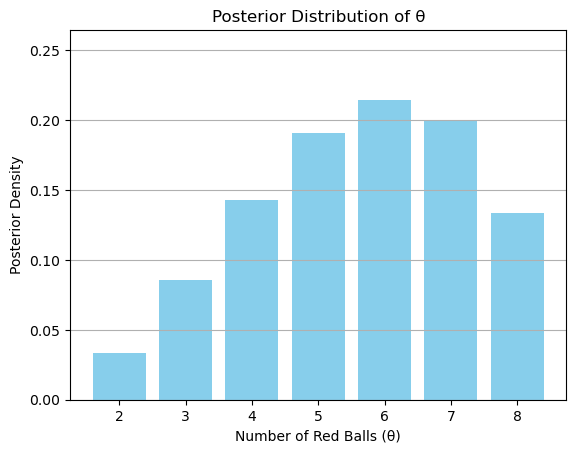

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 9  # Total number of balls
n = 3  # Number of balls chosen
y = 2  # Number of red balls chosen

# Range of possible red balls in the box
theta_values = np.arange(2, 9)  # Possible values for theta (2 to 8)

# Calculate the posterior density
posterior_density = []
for theta in theta_values:
    if theta >= y and (N - theta) >= (n - y):  # Ensure valid hypergeometric conditions
        k_theta = (theta * (theta - 1) * (N - theta))  # k(theta)
        posterior_density.append(k_theta)
    else:
        posterior_density.append(0)  # Invalid theta values

# Normalize the posterior density
c = sum(posterior_density)
posterior_density = [k / c for k in posterior_density]

# Print the results
for theta, density in zip(theta_values, posterior_density):
    print(f"Theta: {theta}, Posterior Density: {density:.4f}")

# Plotting the posterior distribution
plt.bar(theta_values, posterior_density, color='skyblue')
plt.xlabel('Number of Red Balls (θ)')
plt.ylabel('Posterior Density')
plt.title('Posterior Distribution of θ')
plt.xticks(theta_values)
plt.ylim(0, max(posterior_density) + 0.05)
plt.grid(axis='y')
plt.show()


### Exercise 8: The Binomial-Beta Model

Consider the following Bayesian model:

$$
(y | \theta) \sim \text{Binomial}(n, \theta)
$$
$$
\theta \sim \text{Beta}(\alpha, \beta) \quad \text{(prior)}
$$

#### Solution

The posterior density is given by:

$$
f(\theta | y) \propto f(\theta) f(y | \theta)
$$

Substituting the densities:

$$
f(\theta | y) \propto \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \cdot \binom{n}{y} \theta^y (1 - \theta)^{n - y}
$$

Ignoring constants that do not depend on \(\theta\):

$$
\propto \theta^{\alpha + y - 1} (1 - \theta)^{\beta + n - y - 1}
$$

This expression is recognized as the kernel of a Beta distribution:

$$
\theta | y \sim \text{Beta}(\alpha + y, \beta + n - y)
$$

Thus, the posterior density of \(\theta\) is:

$$
f(\theta | y) = \frac{\theta^{\alpha + y - 1} (1 - \theta)^{\beta + n - y - 1}}{B(\alpha + y, \beta + n - y)} \quad \text{for } 0 < \theta < 1
$$

#### Example

Suppose $\alpha = \beta = 1$ (i.e., $\theta \sim \text{Beta}(1,1)$), which corresponds to a uniform prior:

$$
f(\theta) = 1, \quad 0 < \theta < 1
$$

Now, let $n = 2$. The possible values of $y$ are 0, 1, and 2, leading to the following three posteriors:

1. For $y = 0$:

   $$
   f(\theta | 0) \sim \text{Beta}(1 + 0, 1 + 2 - 0) = \text{Beta}(1, 3)
   $$

2. For $y = 1$:

   $$
   f(\theta | 1) \sim \text{Beta}(1 + 1, 1 + 2 - 1) = \text{Beta}(2, 2)
   $$

3. For $y = 2$:

   $$
   f(\theta | 2) \sim \text{Beta}(1 + 2, 1 + 2 - 2) = \text{Beta}(3, 1)
   $$


Note: The prior here may be considered uninformative because it is ‘flat’ over the entire range of possible values for $\theta$ , namely 0 to 1. This prior was originally used by Thomas Bayes and is often called the Bayes prior. However, other uninformative priors have been proposed for the binomial parameter $\theta$ . These will be discussed later.

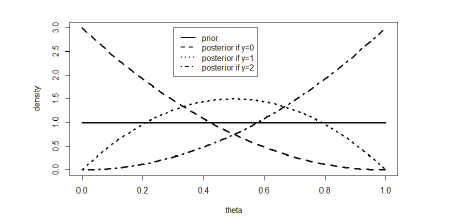
Figure : The prior and three posteriors in Exercise

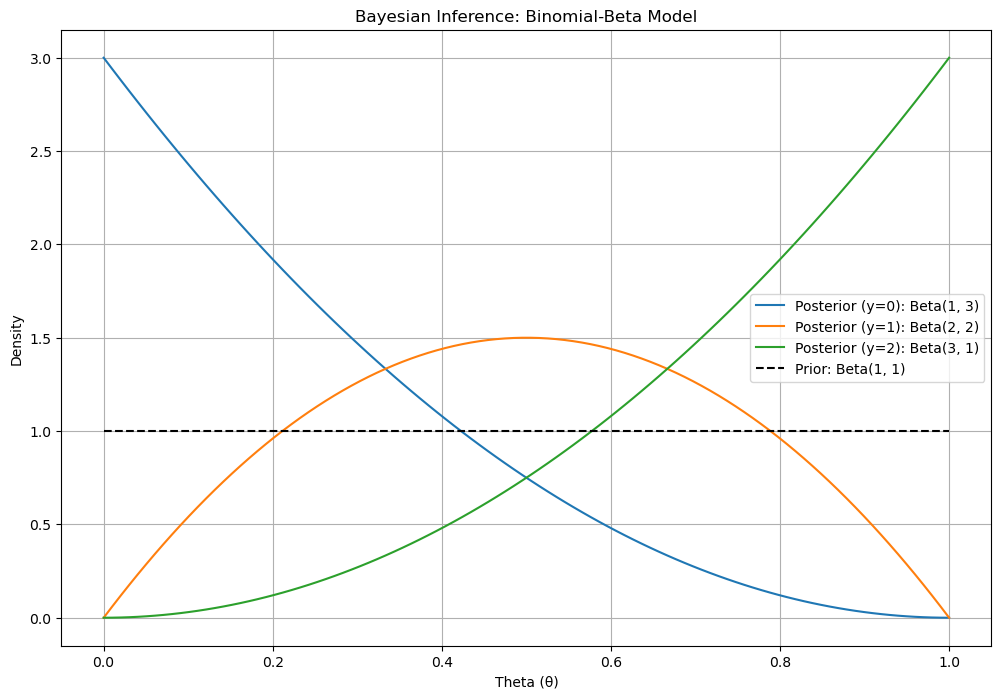

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the Beta prior
alpha_prior = 1
beta_prior = 1

# Number of trials
n = 2

# Observed successes
y_values = [0, 1, 2]

# Set up the theta values for plotting
theta = np.linspace(0, 1, 100)

# Plot the prior and posterior distributions for each observed success
plt.figure(figsize=(12, 8))

for y in y_values:
    # Update the parameters of the Beta distribution based on the observation
    alpha_post = alpha_prior + y
    beta_post = beta_prior + n - y
    
    # Calculate the posterior distribution
    posterior = beta.pdf(theta, alpha_post, beta_post)
    
    # Plotting
    plt.plot(theta, posterior, label=f'Posterior (y={y}): Beta({alpha_post}, {beta_post})')

# Plot prior distribution
plt.plot(theta, beta.pdf(theta, alpha_prior, beta_prior), 'k--', label='Prior: Beta(1, 1)')

plt.title('Bayesian Inference: Binomial-Beta Model')
plt.xlabel('Theta (θ)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()
